<Axes: >

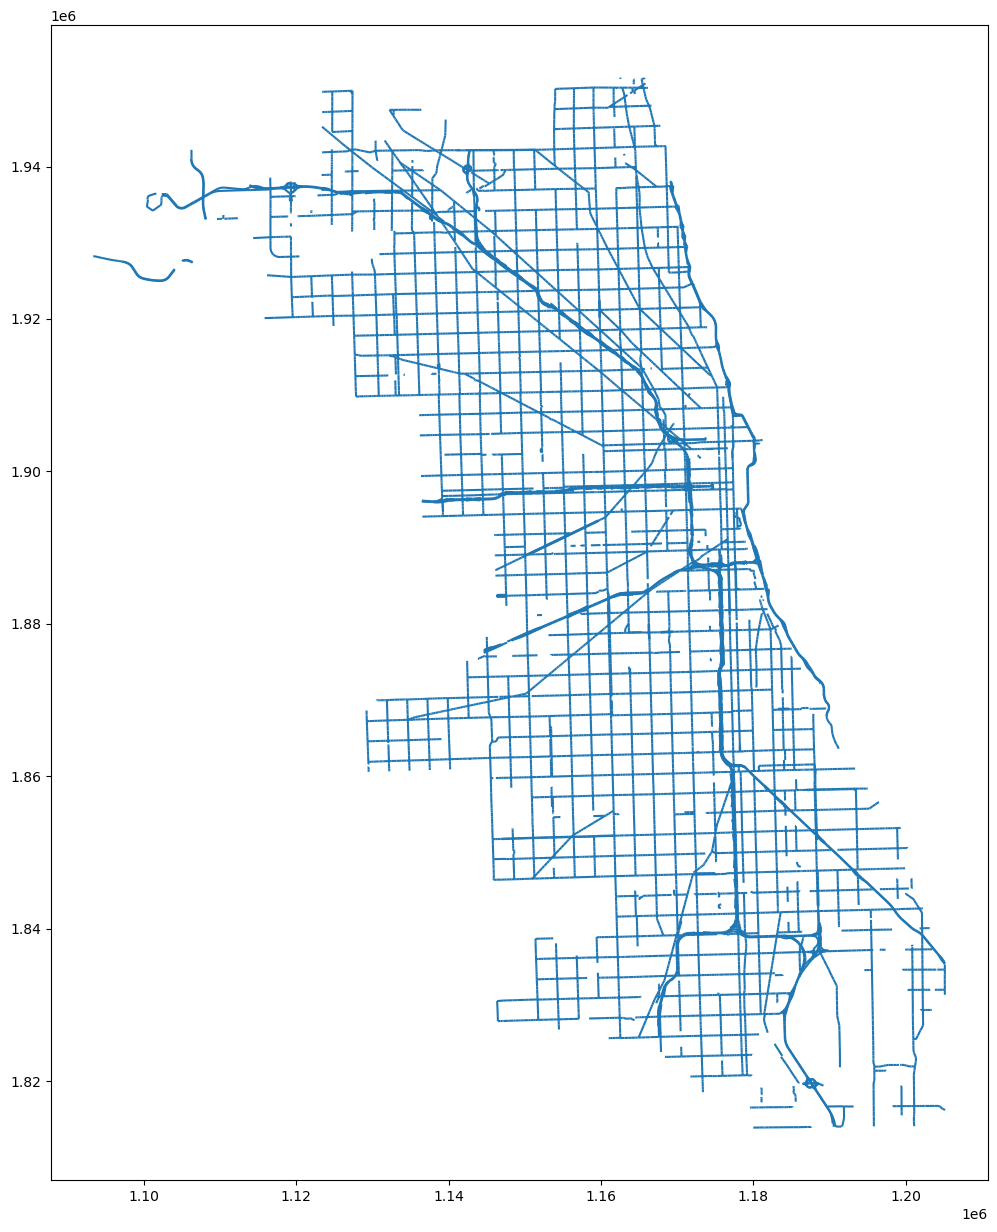

In [1]:
# pip install geopandas
# pip install descartes

## installs should be one-time only

import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

# make sure all files from Major Streets are in same directory
# will make this cleaner later on
streets = gpd.read_file('../geo/Major_Streets.shp')

fig, ax = plt.subplots(figsize = (15,15))
streets.plot(ax = ax)

In [2]:
clinics = pd.read_pickle('../data/clinics.pkl', compression='zip')

In [96]:
init = pd.read_pickle('../data/init.pkl', compression='zip')

In [98]:
intake = pd.read_pickle('../data/intake.pkl', compression='zip')

In [100]:
crime = pd.read_pickle('../data/crime.pkl', compression='zip')

In [160]:
div = pd.read_pickle('../data/div.pkl', compression='zip')

In [163]:
intake.head()

,case_id,case_participant_id,received_date,offense_category,participant_status,age_at_incident,race,gender,incident_begin_date,law_enforcement_agency,arrest_date,felony_review_date,felony_review_result,update_offense_category,incident_city,unit,incident_end_date
0,397972257643,119332717984,2011-05-24T00:00:00.000,PROMIS Conversion,Continued Investigation,25,Black,Male,2007-03-12T00:00:00.000,PROMIS Data Conversion,2007-04-03T00:00:00.000,2011-05-24T00:00:00.000,Approved,PROMIS Conversion,NaN,NaN,NaN
1,397972257643,119332771776,2011-05-24T00:00:00.000,PROMIS Conversion,Approved,22,Black,Male,2007-03-12T00:00:00.000,PROMIS Data Conversion,2011-05-22T18:51:00.000,2011-05-24T00:00:00.000,Approved,PROMIS Conversion,NaN,NaN,NaN
2,397972257643,119332825569,2011-05-24T00:00:00.000,PROMIS Conversion,Continued Investigation,19,Black,Male,2007-03-12T00:00:00.000,PROMIS Data Conversion,NaN,2011-05-24T00:00:00.000,Approved,PROMIS Conversion,NaN,NaN,NaN
3,408037004687,124855630095,2012-01-27T00:00:00.000,PROMIS Conversion,Approved,NaN,Black,Male,2009-06-25T00:00:00.000,CPD SPEC INV-YOUTH,2009-07-14T14:34:00.000,2009-07-14T00:00:00.000,Charge(S) Approved,PROMIS Conversion,NaN,NaN,NaN
4,432652711797,124726365872,2011-01-31T00:00:00.000,PROMIS Conversion,Approved,37,HISPANIC,Male,2010-04-07T00:00:00.000,SPEC. OPERATIONS,2010-04-07T20:40:00.000,NaN,NaN,PROMIS Conversion,NaN,NaN,NaN


In [168]:
HDBHR = pd.read_pickle('../data/HDBHR.pkl', compression='zip')

In [174]:
HDBHR['g'].value_counts()

1714000    84
60644       7
60626       7
60628       7
60629       7
60630       7
60631       7
60633       7
60634       7
60637       7
60638       7
60639       7
60640       7
60643       7
60645       7
60617       7
60646       7
60649       7
60651       7
60652       7
60653       7
60655       7
60656       7
60657       7
60659       7
60660       7
60707       7
60827       7
60620       7
60601       7
60602       7
60614       7
60604       7
60606       7
60607       7
60608       7
60609       7
60612       7
60616       7
60618       7
60619       7
60621       7
60622       7
60623       7
60624       7
60625       7
60632       7
60636       7
60641       7
60642       7
60647       7
60654       7
60661       7
60605       7
60610       7
60611       7
60613       7
60615       7
60603       5
Name: g, dtype: int64

In [166]:
init['incident_city'].value_counts().head(50)

Chicago               751907
Cicero                 16163
Harvey                 11990
Calumet City            9747
Chicago Heights         9596
Orland Park             8633
Berwyn                  8104
Dolton                  7749
Oak Lawn                7527
Maywood                 6301
Schaumburg              6232
Evanston                6228
Blue Island             6001
Skokie                  5498
Lansing                 5487
Evergreen Park          5477
DesPlaines              5432
Oak Park                5377
Matteson                5370
Arlington Heights       5147
Melrose Park            5076
Palatine                5003
Park Forest             4886
Homewood                4830
Sauk Village            4557
Markham                 4505
Riverdale               4343
Mount Prospect          4326
Forest Park             4318
Streamwood              4221
South Holland           3936
Hoffman Estates         3794
Tinley Park             3430
Wheeling                3358
Bellwood      

In [161]:
div.head()

,case_id,case_participant_id,received_date,offense_category,diversion_program,referral_date,diversion_count,primary_charge_offense_title,statute,race,gender,diversion_result,diversion_closed_date
0,698837098171,405118970904,2011-01-01T00:00:00.000,Retail Theft,DS,2013-06-17T00:00:00.000,2,RETAIL THEFT,720 ILCS 5/16A-3(a),Black,Male,Graduated,2013-06-17T00:00:00.000
1,698837098171,405118970904,2011-01-01T00:00:00.000,Retail Theft,VC,2011-08-11T00:00:00.000,1,RETAIL THEFT,720 ILCS 5/16A-3(a),Black,Male,NaN,NaN
2,698842998260,405124350189,2011-01-02T00:00:00.000,Retail Theft,MHC,2012-09-14T00:00:00.000,1,RETAIL THEFT,720 ILCS 5/16A-3(a),Black,Male,Failed,2012-09-14T00:00:00.000
3,698850507464,405130912917,2011-01-03T00:00:00.000,Narcotics,MHC,2018-07-27T00:00:00.000,1,[POSSESSION OF CONTROLLED SUBSTANCE WITH INTEN...,720 ILCS 570/401(d)(i),Black,Female,NaN,NaN
4,698850507464,405130966710,2011-01-03T00:00:00.000,Narcotics,MHC,2018-07-27T00:00:00.000,1,POSSESSION OF A CONTROLLED SUBSTANCE,720 ILCS 570/402(c),White,Male,NaN,NaN


In [111]:
crime

,id,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,...,longitude,location,:@computed_region_awaf_s7ux,:@computed_region_6mkv_f3dw,:@computed_region_vrxf_vc4k,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu,:@computed_region_rpca_8um6,:@computed_region_d9mm_jgwp,:@computed_region_d3ds_rm58
0,13046690,JG228930,2023-04-18T23:59:00.000,026XX S KILDARE AVE,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,ALLEY,False,False,...,-87.7318287,"{'latitude': '41.843484949', 'longitude': '-87...",14,21569,32,205,28,57,21,167
1,13046700,JG228905,2023-04-18T23:47:00.000,0000X W ROOSEVELT RD,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,-87.628149145,"{'latitude': '41.867404119', 'longitude': '-87...",48,14913,38,330,10,35,22,144
2,13046696,JG228904,2023-04-18T23:32:00.000,025XX N SPRINGFIELD AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,...,-87.724400318,"{'latitude': '41.927052012', 'longitude': '-87...",27,22535,23,186,17,1,6,181
3,13047932,JG230321,2023-04-18T23:30:00.000,048XX S LOOMIS BLVD,0810,THEFT,OVER $500,APARTMENT,False,True,...,-87.660033433,"{'latitude': '41.805929086', 'longitude': '-87...",53,14924,59,739,4,37,23,118
4,13046900,JG229136,2023-04-18T23:30:00.000,064XX S ELLIS AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,-87.600403043,"{'latitude': '41.778115781', 'longitude': '-87...",53,22260,9,347,4,60,18,273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,11541771,JB561427,2018-12-18T19:30:00.000,005XX E 88TH ST,5002,OTHER OFFENSE,OTHER VEHICLE OFFENSE,SIDEWALK,False,False,...,-87.61139698,"{'latitude': '41.734726658', 'longitude': '-87...",31,21546,40,407,43,61,20,241
49996,11539997,JB559249,2018-12-18T19:30:00.000,015XX W VICTORIA ST,0820,THEFT,$500 AND UNDER,VEHICLE NON-COMMERCIAL,False,False,...,-87.668131905,"{'latitude': '41.987161809', 'longitude': '-87...",40,4451,76,539,16,14,2,54
49997,11539999,JB559248,2018-12-18T19:30:00.000,015XX W VICTORIA ST,0820,THEFT,$500 AND UNDER,VEHICLE NON-COMMERCIAL,False,False,...,-87.668459334,"{'latitude': '41.987155473', 'longitude': '-87...",40,4451,76,539,16,14,2,54
49998,11541285,JB559718,2018-12-18T19:30:00.000,071XX S VINCENNES AVE,0320,ROBBERY,STRONGARM - NO WEAPON,SIDEWALK,False,False,...,-87.627981404,"{'latitude': '41.765332603', 'longitude': '-87...",31,21559,67,494,32,11,17,210


In [112]:
cr_map = crime[['latitude','longitude']]

In [113]:
cr_map = cr_map.astype(float)

Text(0.5, 1.0, 'Crime')

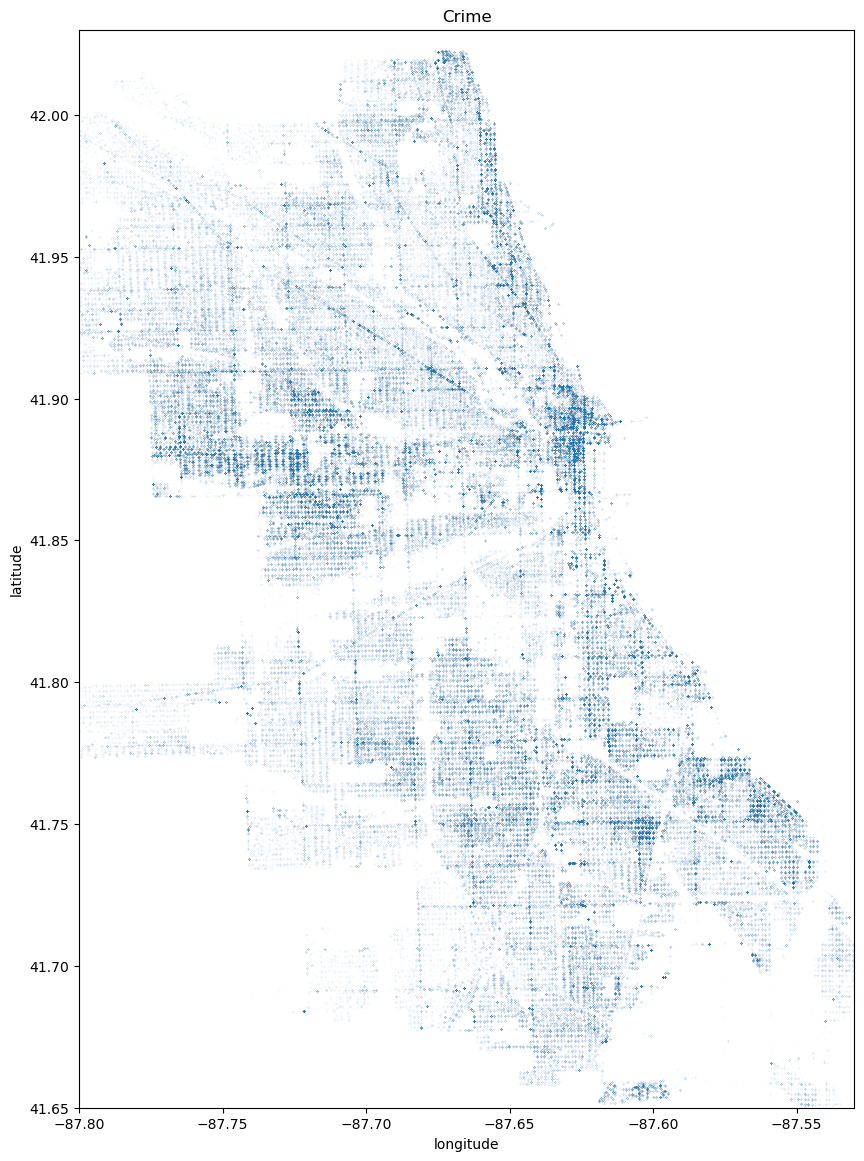

In [158]:
cr_map.plot.scatter(y = 'latitude',
                    x = 'longitude',
                    s = 0.0001,
                    figsize = (10,14)
                   )
plt.xlim(-87.80,-87.53)
plt.ylim(41.65,42.03)
plt.title('Crime')

In [110]:
type(cr_map['latitude'])

pandas.core.series.Series

In [99]:
intake.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 481655 entries, 0 to 31654
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   case_id                  481655 non-null  object
 1   case_participant_id      481655 non-null  object
 2   received_date            481655 non-null  object
 3   offense_category         481655 non-null  object
 4   participant_status       455838 non-null  object
 5   age_at_incident          466981 non-null  object
 6   race                     465432 non-null  object
 7   gender                   467958 non-null  object
 8   incident_begin_date      471085 non-null  object
 9   law_enforcement_agency   478295 non-null  object
 10  arrest_date              433682 non-null  object
 11  felony_review_date       288582 non-null  object
 12  felony_review_result     288582 non-null  object
 13  update_offense_category  481655 non-null  object
 14  incident_city        

In [97]:
init.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1121605 entries, 0 to 21604
Data columns (total 38 columns):
 #   Column                                 Non-Null Count    Dtype 
---  ------                                 --------------    ----- 
 0   case_id                                1121605 non-null  object
 1   case_participant_id                    1121605 non-null  object
 2   received_date                          1121605 non-null  object
 3   offense_category                       1121605 non-null  object
 4   primary_charge                         1121605 non-null  bool  
 5   charge_id                              1121605 non-null  object
 6   charge_version_id                      1121605 non-null  object
 7   charge_offense_title                   1121605 non-null  object
 8   charge_count                           1121605 non-null  object
 9   chapter                                1121605 non-null  object
 10  class                                  1121605 non-null 

In [167]:
clinics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 51 columns):
 #   Column                                                  Non-Null Count  Dtype 
---  ------                                                  --------------  ----- 
 0   organization                                            171 non-null    object
 1   site_name                                               171 non-null    object
 2   site_type                                               171 non-null    object
 3   address                                                 171 non-null    object
 4   zip                                                     171 non-null    object
 5   main_phone                                              169 non-null    object
 6   service_request_phone                                   169 non-null    object
 7   evening_hours_availability                              171 non-null    bool  
 8   evening_hours_detail                              

In [95]:
output = []
for x in clinics['location']:
    for k, v in x.items():
        print(v)

Point
[-87.58799, 41.7952]
Point
[-87.70714, 41.91013]
Point
[-87.7259, 41.91141]
Point
[-87.64482, 41.78125]
Point
[-87.75336, 41.87295]
Point
[-87.66014, 41.98586]
Point
[-87.69189, 41.85012]
Point
[-87.67652, 41.85217]
Point
[-87.69304, 41.86219]
Point
[-87.67386, 41.95629]
Point
[-87.69652, 41.91022]
Point
[-87.7068, 41.84814]
Point
[-87.64123, 41.77982]
Point
[-87.68385, 41.787]
Point
[-87.65118, 41.88308]
Point
[-87.6058, 41.77474]
Point
[-87.63329, 41.85292]
Point
[-87.77683, 41.93113]
Point
[-87.61777, 41.80209]
Point
[-87.75048, 41.88044]
Point
[-87.68213, 41.86799]
Point
[-87.70784, 41.84449]
Point
[-87.53751, 41.68127]
Point
[-87.73057, 41.846]
Point
[-87.65495, 41.96148]
Point
[-87.60205, 41.76375]
Point
[-87.73028, 41.80062]
Point
[-87.76088, 41.92407]
Point
[-87.66473, 41.79983]
Point
[-87.60671, 41.81626]
Point
[-87.72324, 41.84154]
Point
[-87.69422, 41.80819]
Point
[-87.64589, 41.93407]
Point
[-87.5956, 41.6222]
Point
[-87.59648, 41.73531]
Point
[-87.70843, 41.90279]
Po

AttributeError: 'float' object has no attribute 'items'

In [79]:
for k, v in [clinics['location'][i].items() for i in range(100)]:
    print(k,v)

AttributeError: 'float' object has no attribute 'items'

In [51]:
clinics['location']['coordinates']

KeyError: 'coordinates'

In [49]:
output = []
for _ in clinics['location']:
    
    

SyntaxError: invalid syntax (3925797495.py, line 1)

In [36]:
for i in range(len(clinics)):
    print(clinics['location'][i]['coordinates'])

[-87.58799, 41.7952]
[-87.70714, 41.91013]
[-87.7259, 41.91141]
[-87.64482, 41.78125]
[-87.75336, 41.87295]
[-87.66014, 41.98586]
[-87.69189, 41.85012]
[-87.67652, 41.85217]
[-87.69304, 41.86219]
[-87.67386, 41.95629]
[-87.69652, 41.91022]
[-87.7068, 41.84814]
[-87.64123, 41.77982]
[-87.68385, 41.787]
[-87.65118, 41.88308]
[-87.6058, 41.77474]
[-87.63329, 41.85292]
[-87.77683, 41.93113]
[-87.61777, 41.80209]
[-87.75048, 41.88044]
[-87.68213, 41.86799]
[-87.70784, 41.84449]
[-87.53751, 41.68127]
[-87.73057, 41.846]
[-87.65495, 41.96148]
[-87.60205, 41.76375]
[-87.73028, 41.80062]
[-87.76088, 41.92407]
[-87.66473, 41.79983]
[-87.60671, 41.81626]
[-87.72324, 41.84154]
[-87.69422, 41.80819]
[-87.64589, 41.93407]
[-87.5956, 41.6222]
[-87.59648, 41.73531]
[-87.70843, 41.90279]
[-87.67031, 42.01936]
[-87.71573, 41.91001]
[-87.68312, 41.76908]
[-87.63298, 41.77811]
[-87.71726, 41.92462]
[-87.64516, 41.79381]
[-87.58594, 41.7667]
[-87.75818, 41.77539]
[-87.71973, 41.85893]
[-87.70535, 41.80681]

TypeError: 'float' object is not subscriptable

In [23]:
print(loc)

None


In [59]:
g = int(len(clinics))

In [60]:
loc = []
for i in range(g):
    loc.append(clinics['location'][i]['coordinates'][0:2])

TypeError: 'float' object is not subscriptable

In [50]:
loc

[[-87.58799, 41.7952],
 [-87.70714, 41.91013],
 [-87.7259, 41.91141],
 [-87.64482, 41.78125],
 [-87.75336, 41.87295],
 [-87.66014, 41.98586],
 [-87.69189, 41.85012],
 [-87.67652, 41.85217],
 [-87.69304, 41.86219],
 [-87.67386, 41.95629],
 [-87.69652, 41.91022],
 [-87.7068, 41.84814],
 [-87.64123, 41.77982],
 [-87.68385, 41.787],
 [-87.65118, 41.88308],
 [-87.6058, 41.77474],
 [-87.63329, 41.85292],
 [-87.77683, 41.93113],
 [-87.61777, 41.80209],
 [-87.75048, 41.88044],
 [-87.68213, 41.86799],
 [-87.70784, 41.84449],
 [-87.53751, 41.68127],
 [-87.73057, 41.846],
 [-87.65495, 41.96148],
 [-87.60205, 41.76375],
 [-87.73028, 41.80062],
 [-87.76088, 41.92407],
 [-87.66473, 41.79983],
 [-87.60671, 41.81626],
 [-87.72324, 41.84154],
 [-87.69422, 41.80819],
 [-87.64589, 41.93407],
 [-87.5956, 41.6222],
 [-87.59648, 41.73531],
 [-87.70843, 41.90279],
 [-87.67031, 42.01936],
 [-87.71573, 41.91001],
 [-87.68312, 41.76908],
 [-87.63298, 41.77811],
 [-87.71726, 41.92462],
 [-87.64516, 41.79381],
 [

In [17]:
loc = []
a    loc.append(clinics['location'][i]['coordinates'])

TypeError: 'float' object is not subscriptable

In [12]:
alocations = []
for i in range(len(clinics)):
    locations.append([clinics['location'][i]['coordinates']])

TypeError: 'float' object is not subscriptable

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [3]:
streets = gpd.read_file('Major_Streets.shp')

<Axes: >

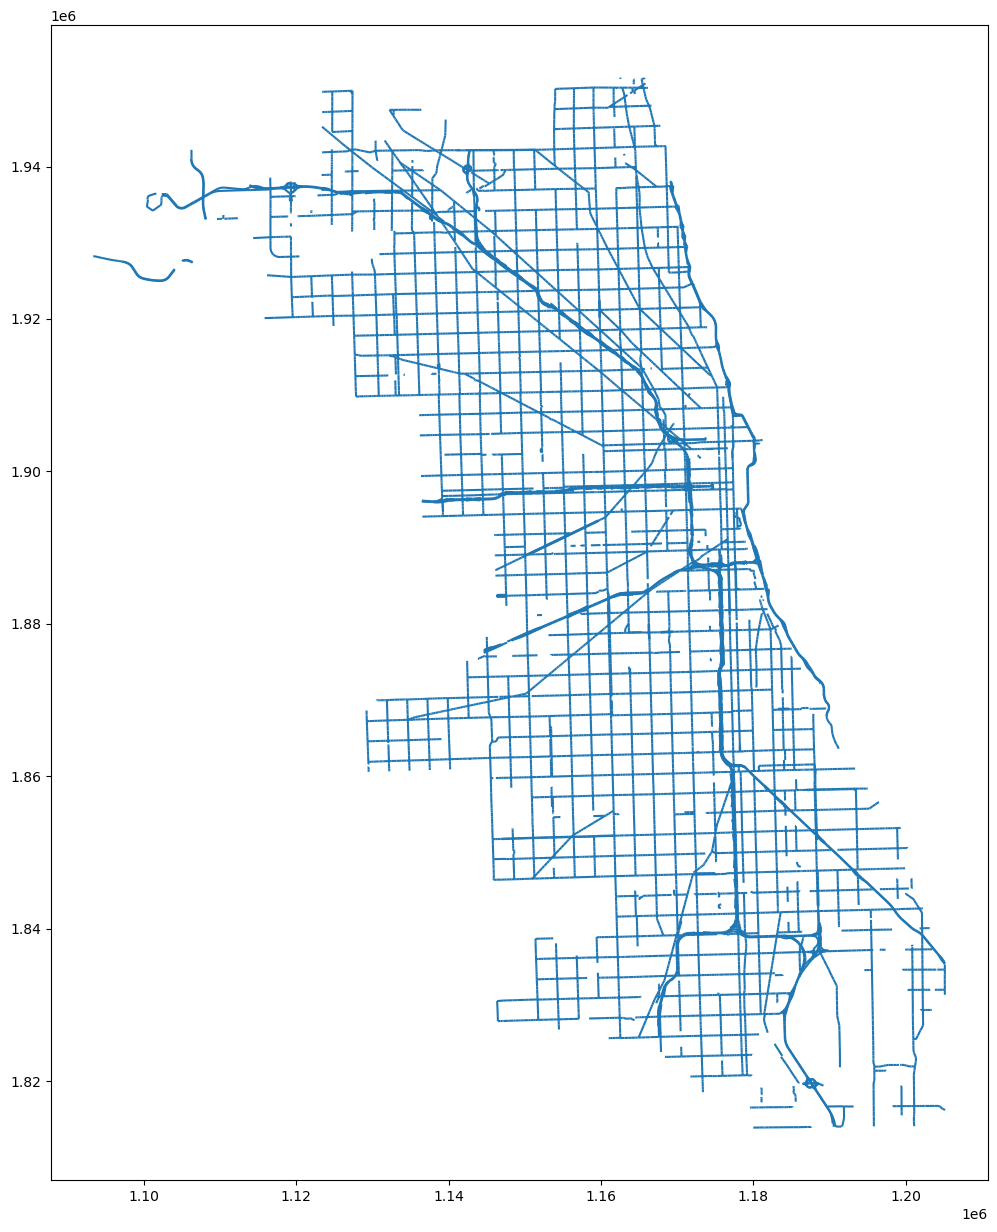

In [6]:
fig, ax = plt.subplots(figsize = (15,15))
streets.plot(ax = ax)

In [7]:
import requests

In [9]:
res = requests.get('https://data.cityofchicago.org/widgets/ueqs-5wr6')

JSONDecodeError: Expecting value: line 1 column 1 (char 0)